# Task 1

1) Load the data into a Pandas Dataframe.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 100 # This line is to make all the images bigger, with a higher DPI.

data = pd.read_csv('mobile_price_1.csv')

2) Which of the categorical features are nominal and which are ordinal?

 NOMINAL: bluetooth, screen
 
 ORDINAL: gen, cores, speed, sim, wifi

3) Add a column that holds the total screen resolution for each device. Name it resolution.

In [3]:
data['resolution'] = data['px_height'] * data['px_width']

4) Add a column that holds the DPI (dots per inch) of the screen width and name it DPI_w.

In [4]:
data['DPI_w'] = np.where(data['sc_w'] == 0, np.nan, data['px_width']/(data['sc_w']*0.393701))  # 1cm = 0.393701 inches

5) Add a column that holds the ratio battery_power/talk_time and name it call_ratio.

In [5]:
data['call_ratio'] = data['battery_power']/data['talk_time']

6) Change the memory column to hold the memory in GB instead of MB.

In [8]:
data['memory'] = data['memory']/1024.

7) Include the output of the `describe()` function of the dataframe.

In [9]:
data.describe()

,id,battery_power,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,gen,f_camera,camera,memory,price,resolution,DPI_w,call_ratio
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1526.000000,1899.000000,2000.000000,2000.00000,2.000000e+03,1820.000000,2000.000000
mean,999.500000,1238.518500,0.501750,140.249000,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,3.283000,5.648100,10.443918,0.031039,862.02435,9.052601e+05,931.175981,166.672629
std,577.494589,439.418206,0.288416,35.399655,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.824773,4.140169,5.763826,0.017320,230.26348,8.297625e+05,992.677877,156.664965
min,0.000000,501.000000,0.100000,80.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.001863,307.11000,0.000000e+00,81.279956,25.100000
25%,499.750000,851.750000,0.200000,109.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,3.000000,2.000000,6.000000,0.015660,698.46750,2.632005e+05,319.531827,75.737500
50%,999.500000,1226.000000,0.500000,141.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,4.000000,5.000000,10.000000,0.030807,837.63000,6.013590e+05,536.856932,111.369318
75%,1499.250000,1615.250000,0.800000,170.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,4.000000,8.000000,15.000000,0.046101,1006.71250,1.359027e+06,1120.562728,186.193750
max,1999.000000,1998.000000,1.000000,200.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,4.000000,19.000000,20.000000,0.061914,1728.97000,3.886306e+06,5057.137269,989.500000


8) Include a histogram of the prices.

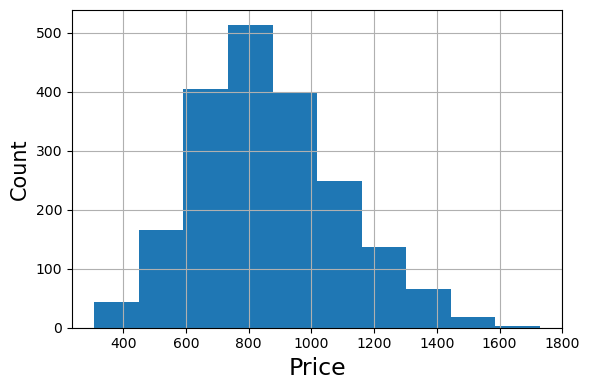

In [10]:
plt.figure(1)
data['price'].hist() # command to plot a histogram of the column 'price' of the DataFrame.
plt.xlabel('Price', size=17)
plt.ylabel('Count', size = 15)
plt.tight_layout()

# Task 2

1) Plot a correlation heatmap of the data set and include it. 

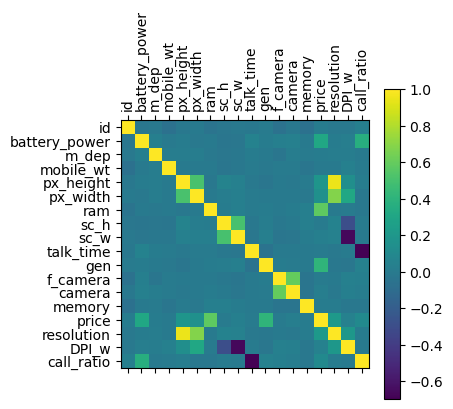

In [12]:
data_2 = data.select_dtypes('number') # In this section we create a correlation matrix, and then we plot it as a heatmap.
# The correlation matrix is made of all the numeric data in the DataFrame, 
# so this command takes only the numeric values aveiable on the DataFrame, and define a hole new DataFrame (data_2) 
# out of this values.

plt.matshow(data_2.corr())
plt.colorbar()
plt.xticks(ticks = np.arange(len(data_2.columns)), labels = data_2.columns, rotation='vertical')
plt.yticks(ticks = np.arange(len(data_2.columns)), labels = data_2.columns)
plt.show()

2) Which features would you say are correlated with the device price?

The features that are correlated with the price are: battery power, RAM, gen.

3) Are there features not shown in the correlation matrix that are correlated with the price? If so, what are they?

The features that are made up of strings may be correlated with the price, such as the cores or the speed.

4) For each feature correlated with the price, plot its relationship with price.

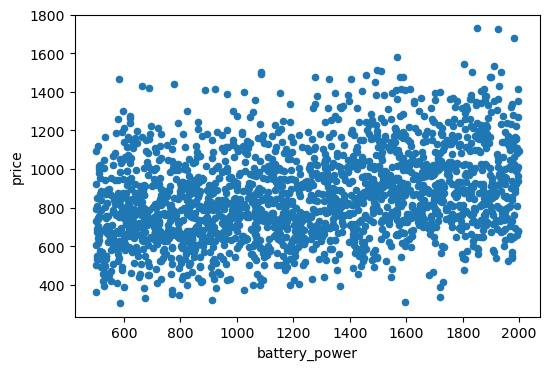

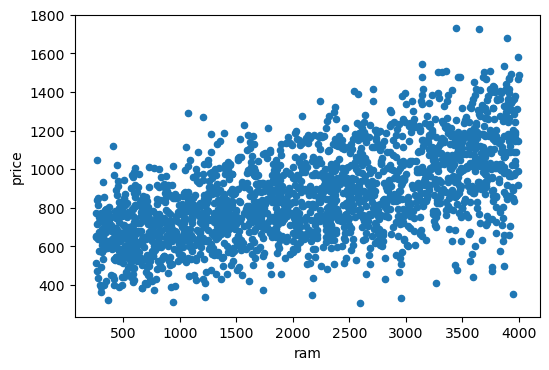

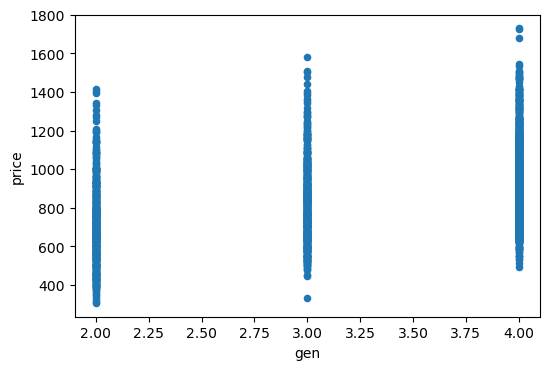

In [13]:
data.plot.scatter(x='battery_power', y='price') # Command to make a scatter plot of a column ('price' in this case) vs
                                                # another column of the DataFrame ('batter_power').

data.plot.scatter(x='ram', y='price')

data.plot.scatter(x='gen', y='price')


plt.show()

5) Select 3 features that are correlated with price and create a pivot table showing average price with relation to cross sections of those 3 features (remember to divide numerical features into cuts, for example quartile cuts).

In [14]:
# In this section we are going to create a pivot table, and first we need to group the data in quartiles. For this,
# we create an entire new DataFrame so we don't mix the grouped data with the original data.

new_table = pd.DataFrame()

new_table['battery_power'] = pd.qcut(data['battery_power'], q=4) # Divide the data in 4 (4 quartiles)
new_table['ram'] = pd.qcut(data['ram'], q=4) # Divide the data in 4 (4 quartiles)
new_table['price'] = data['price'] # We don't divide the price, but also include it in the new DataFame.
new_table['gen'] = data['gen'] # We don't divide the gen, but also include it in the new DataFame.

table = pd.pivot_table(new_table, values='price', index = ['battery_power', 'ram'], columns=['gen'], aggfunc=np.mean)
# Command to create the pivot table.

print(table)

gen                                            2            3            4
battery_power     ram                                                     
(500.999, 851.75] (255.999, 1207.5]   474.814231   579.873750   703.555429
                  (1207.5, 2146.5]    598.608824   713.162222   792.796607
                  (2146.5, 3064.5]    649.010270   761.110488   888.411094
                  (3064.5, 3998.0]    807.651538   951.960000  1023.281304
(851.75, 1226.0]  (255.999, 1207.5]   511.820789   599.932333   739.327031
                  (1207.5, 2146.5]    663.267308   761.402432   861.699870
                  (2146.5, 3064.5]    713.824783   843.563793   947.322759
                  (3064.5, 3998.0]    838.220000   982.348611  1082.820000
(1226.0, 1615.25] (255.999, 1207.5]   609.913750   667.167000   813.443103
                  (1207.5, 2146.5]    655.748696   780.206800   917.325797
                  (2146.5, 3064.5]    783.205556   874.997188   994.800000
                  (3064.5

# Task 3

1) For each ordinal feature \<\O\>, add a column to the dataframe which holds the ordered values representing each original value of F. This new column will be named \<\O\>_ord. (without the triangle brackets)

In [19]:
# Here we iterate over all the ordinal features, and we create lists of each value the feature can take, ordered! Then, we create
# a column made of the index the value takes in the list, so the new list is made of numbers, each corresponding to
# the ordered value. For example Single <--> 1, Dual <--> 2, ...

for i in ['cores', 'speed', 'sim', 'gen', 'wifi']:
    a = list(data[i].value_counts().keys())
    if i == 'cores':
        ordered_cores = ['single', 'dual', 'triple', 'quad', 'penta', 'hexa', 'hepta', 'octa']
        temp = []
        for j in list(data[i]):
            temp.append(ordered_cores.index(j)+1)
        data['cores_ord'] = temp
    elif i == 'speed':
        ordered_speed = ['low', 'medium', 'high']
        temp = []
        for j in list(data[i]):
            temp.append(ordered_speed.index(j)+1)
        data['speed_ord'] = temp
    elif i == 'sim':
        ordered_sim = ['Single', 'Dual']
        temp = []
        for j in list(data[i]):
            temp.append(ordered_sim.index(j)+1)
        data['sim_ord'] = temp
    elif i == 'gen':
        ordered_gen = [2, 3, 4]
        temp = []
        for j in list(data[i]):
            temp.append(ordered_gen.index(j)+1)
        data['gen_ord'] = temp
    elif i == 'wifi':
        ordered_wifi = ['none', 'b', 'a', 'g', 'n']
        temp = []
        for j in list(data[i]):
            temp.append(ordered_wifi.index(j)+1)
        
        
data.head()

,id,battery_power,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,...,screen,wifi,price,resolution,DPI_w,call_ratio,cores_ord,speed_ord,sim_ord,gen_ord
0,0,842,0.6,188,20,756,2549,9,7,19,...,LCD,g,751.64,15120,274.319852,44.315789,2,2,1,1
1,1,1021,0.7,136,905,1988,2631,17,3,7,...,Touch,none,885.17,1799140,1683.172424,145.857143,3,1,2,3
2,2,563,0.9,145,1263,1716,2603,11,2,9,...,Touch,none,1067.78,2167308,2179.318823,62.555556,5,1,2,3
3,3,615,0.8,131,1216,1786,2769,16,8,11,...,LCD,none,819.22,2171776,567.054694,55.909091,6,3,1,2
4,4,1821,0.6,141,1208,1212,1411,8,2,15,...,Touch,none,1023.13,1464096,1539.239169,121.400000,2,2,1,3


2) For each nominal feature \<\N\>, add a binary column OR one-hot encoding (whichever is relevant for that feature) to the dataframe representing the original values. Name binary columns \<\N\>_bin, and prefix one-hot encodings with \<\N\>. (without the triangle brackets)

In [29]:
# Here we iterate over the nominal features that can take binary values.

for i in ['bluetooth', 'screen']:
    a = data[i].value_counts().keys()
    data[i+'_bin'] = np.where(data[i].str.contains(a[1]), 1, 0) # This command creates a 1 when data[i].str.contains(a[1])
    # is True, or 0 when false.

data.head()

,id,battery_power,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,...,wifi_a,wifi_b,wifi_g,wifi_n,wifi_none,wifi_a,wifi_b,wifi_g,wifi_n,wifi_none
0,0,842,0.6,188,20,756,2549,9,7,19,...,0,0,1,0,0,0,0,1,0,0
1,1,1021,0.7,136,905,1988,2631,17,3,7,...,0,0,0,0,1,0,0,0,0,1
2,2,563,0.9,145,1263,1716,2603,11,2,9,...,0,0,0,0,1,0,0,0,0,1
3,3,615,0.8,131,1216,1786,2769,16,8,11,...,0,0,0,0,1,0,0,0,0,1
4,4,1821,0.6,141,1208,1212,1411,8,2,15,...,0,0,0,0,1,0,0,0,0,1


3) Plot a correlation heatmap of the modified data set and include it. 

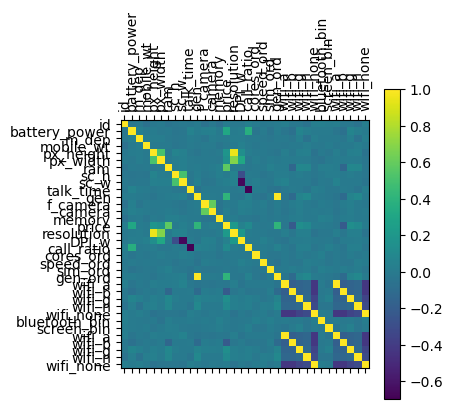

In [22]:
# Here we do the same as in the last heatmap.

data_2 = data.select_dtypes('number')    
    
plt.matshow(data_2.corr())
plt.colorbar()
plt.xticks(ticks = np.arange(len(data_2.columns)), labels = data_2.columns, rotation='vertical')
plt.yticks(ticks = np.arange(len(data_2.columns)), labels = data_2.columns)
plt.show()

4) Save the entire dataframe to a csv file named “mobile_prices_converted.csv” and include it in the submission. Make sure you don’t add a redundant index column.

In [23]:
data.to_csv("mobile_prices_converted.csv", index=False)

# Task 4

1) Choose 4 features and use a 2-d plot to show the relationships between each pair. This should be done in the form of a 4x4 plot matrix as shown in class.

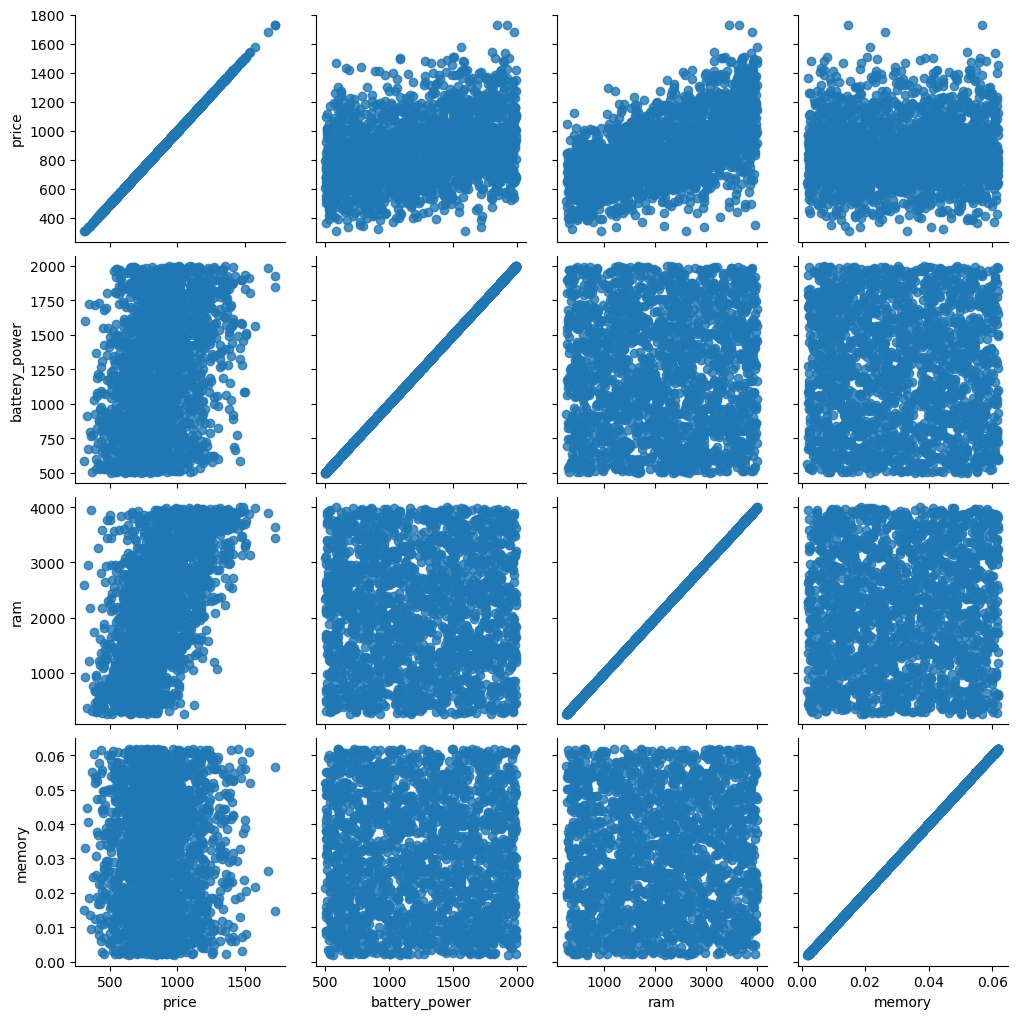

In [24]:
import seaborn as sns

g = sns.PairGrid(data, vars=['price', 'battery_power', 'ram', 'memory'], palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
plt.show()
#These commands are for plotting several graphs.

2) We have shown in class how to plot 4 dimensions of data in a 2-dimensional plot. Use this method to plot the relationship between px_width, px_height, price and core. Px_width and px_height should be the X and Y coordinates respectively. 

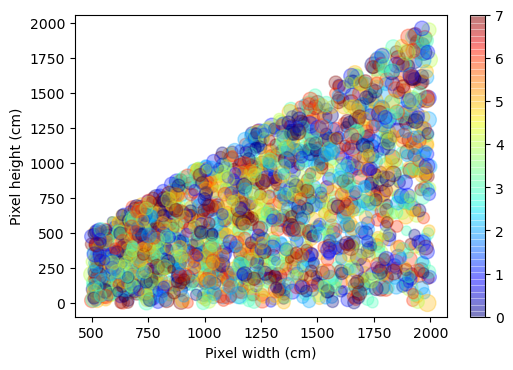

The color represents the cores and the size the prices.


In [25]:
# Here we are going to plot 4 columns in a 2D graph. The colors are taken from the 'cores' column. Each color is represented
# by a unique code, so we need to make a new list where each code represents a specific core.

sorted_color=sorted(data.cores.unique()) # Here we create a list of the cores.

color_cat = pd.Categorical(data['cores'], ordered=True, categories=sorted_color) #Here we assign each core a color
color_cat.codes

plt.figure()
plt.scatter(data['px_width'], data['px_height'], c=color_cat.codes,s=data['price']/10., alpha=0.3,
            cmap='jet') #c is the color and s is the size, we choose the price to be the size of the dots.
plt.xlabel('Pixel width (cm)')
plt.ylabel('Pixel height (cm)')
plt.colorbar()
plt.show()

print('The color represents the cores and the size the prices.')

3) There is an additional file named “mobile_prices_2.csv” distributed alongside the exercise. This file contains a mapping of id to price. This price is a transformation of the price in the original data set. The transformation has been made based on a single feature from the data set. Which feature was used and how do you know? Include any relevant plots and tables.



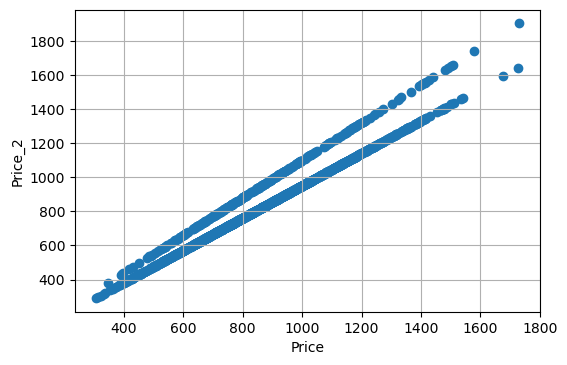

In [26]:
data2 = pd.read_csv('mobile_price_2.csv')

plt.figure()
plt.scatter(data['price'], data2['price_2']) # Scatter the price of the latter csv vs the price of the first csv.
plt.xlabel('Price')
plt.ylabel('Price_2')
plt.grid()
plt.show()

We can see that there are two linear transformations between the prices.

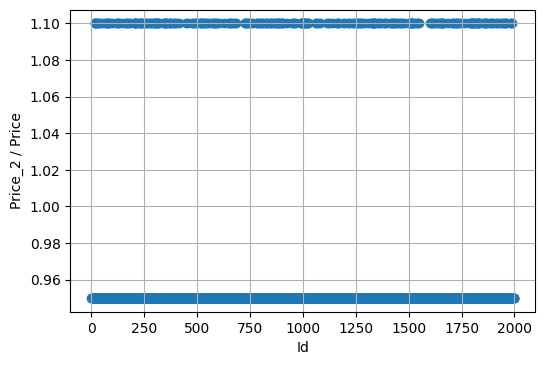

In [18]:
data['Price_2 / Price'] = data2['price_2']/data['price']

plt.figure()
plt.scatter(data['id'], data['Price_2 / Price'])
plt.xlabel('Id')
plt.ylabel('Price_2 / Price')
plt.grid()
plt.show()

We can see that the converted prices are raised by %10 in some rows, and lowered in %5 in others. We have 1731 of +%10 and 269 of -%5.

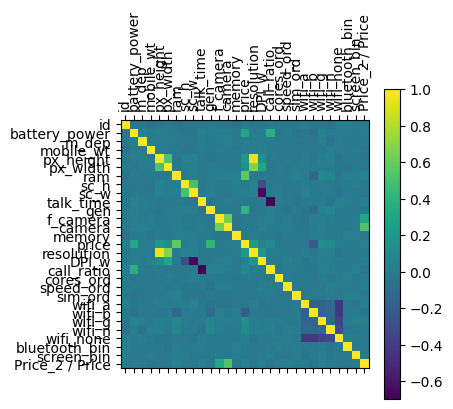

In [19]:
# In this section we create a correlation matrix to look for the feature that is highly correlted with 'Price_2 / Price'.
# For this we need that all the columns that may be involved have numeric values, so we fill the camera values with values.
# If a mobile don't have camera, the cell is empty, so we replae it with a 0.

data.camera.fillna(0, inplace=True)
data.f_camera.fillna(0, inplace=True)

data_2 = data.select_dtypes('number')  
plt.matshow(data_2.corr()) # Here we create the heatmap of the correlation matrix.
plt.colorbar()
plt.xticks(ticks = np.arange(len(data_2.columns)), labels = data_2.columns, rotation='vertical')
plt.yticks(ticks = np.arange(len(data_2.columns)), labels = data_2.columns)
plt.show()

From this graph we can see that the feature that is involved in the transformation is the camera feature.

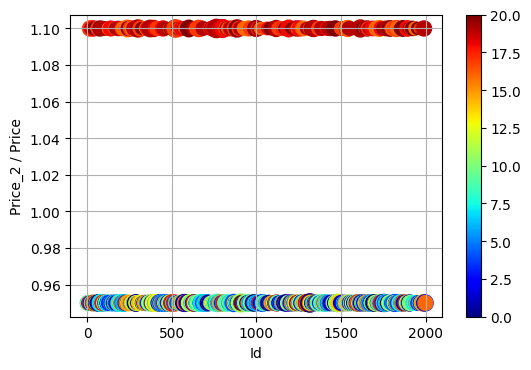

In [20]:
sorted_color=sorted(data.camera.unique())
color_cat = pd.Categorical(data['camera'], ordered=True, categories=sorted_color)
color_cat.codes

plt.figure()
plt.scatter(data['id'], data2['price_2']/data['price'], c = color_cat.codes, s=data.price/10, cmap='jet')
plt.xlabel('Id')
plt.ylabel('Price_2 / Price')
plt.grid()
plt.colorbar()
plt.show()

From this graph we can see that there is a clear division into the color positions.

In [21]:
data.camera[data['Price_2 / Price'] > 1].value_counts() 

20.0    68
17.0    63
19.0    55
16.0    43
18.0    40
Name: camera, dtype: int64

Here we can see that the values that assign (price_2/price) > 1 are only from camera = 16, 17, 18, 19, 20.